<a href="https://colab.research.google.com/github/riskyandrean104/DQLAB-Course/blob/main/Mengenal_Visualisasi_Data_Statistik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import library pandas
import pandas as pd
# membaca file transaksi_retail_dqlab_v2.tsv
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/transaksi_retail_dqlab_v2.tsv", delimiter="\t")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tanggal      1392 non-null   object
 1   Kode Produk  1392 non-null   object
 2   Nama Produk  1392 non-null   object
 3   Jumlah       1392 non-null   int64 
 4   Harga        1392 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 54.5+ KB


In [ ]:
df.isnull().any()

Tanggal        False
Kode Produk    False
Nama Produk    False
Jumlah         False
Harga          False
dtype: bool

In [ ]:
df.head()

,Tanggal,Kode Produk,Nama Produk,Jumlah,Harga
0,10-04-2020,Item-11,Sabun Cuci Piring,3,14000
1,10-04-2020,Item-11,Sabun Cuci Piring,3,14000
2,10-04-2020,Item-11,Sabun Cuci Piring,2,14000
3,10-04-2020,Item-02,Bawang Putih 200 gram,3,15000
4,10-04-2020,Item-03,Gula Pasir Putih 1 kg,2,12500


In [ ]:
import datetime
# membuat kolom baru bernama "Bulan" yang bertipe datetime dalam format "%m-%Y"
df["Bulan"] = df["Tanggal"].apply(
	lambda x: datetime.datetime.strptime(x, "%d-%m-%Y").strftime("%m-%Y")
)

# menghitung jumlah item penjualan per produk per bulan
print(df.groupby(["Bulan", "Nama Produk"])["Jumlah"].sum())

Bulan    Nama Produk            
04-2020  Balsem Putih 20 gram        13
         Batere AA                   79
         Bawang Putih 200 gram      169
         Beras Pulen 5 kg            27
         Biskuit Waver Kaleng        92
         Gula Pasir Putih 1 kg      272
         Ketan Hitam 500 gram        23
         Kopi Instant               123
         Mi Goreng Instant          247
         Obat Batuk                  73
         Obat Diare                   4
         Pisau Cukur                 31
         Roti Tawar                  96
         Sabun Cuci Piring           96
         Sabun Mandi Cair 100 ml    195
         Sabut Cuci Piring           28
         Teh Celup Melati            58
         Telur Ayam Negeri           29
         Vitamin C                   98
05-2020  Batere AA                   93
         Bawang Putih 200 gram      220
         Biskuit Waver Kaleng        43
         Gula Pasir Putih 1 kg      246
         Kopi Instant               217
       

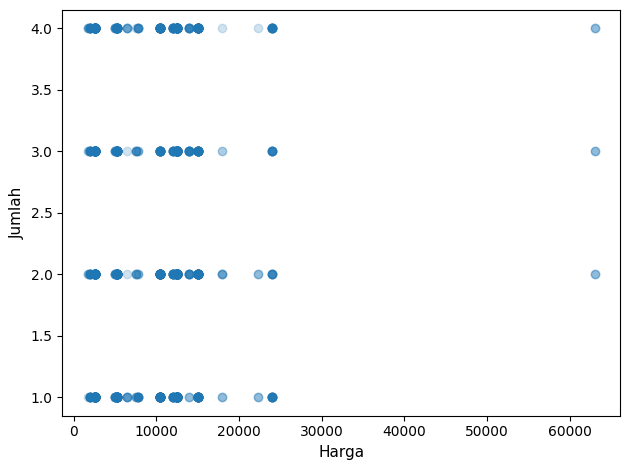

In [ ]:
import matplotlib.pyplot as plt
# plot scatter untuuk kolom "Harga" dan "Jumlah"
plt.scatter(df["Harga"], df["Jumlah"], alpha = 0.2)
plt.xlabel("Harga", fontsize=11)
plt.ylabel("Jumlah", fontsize=11)
plt.tight_layout()
plt.show()

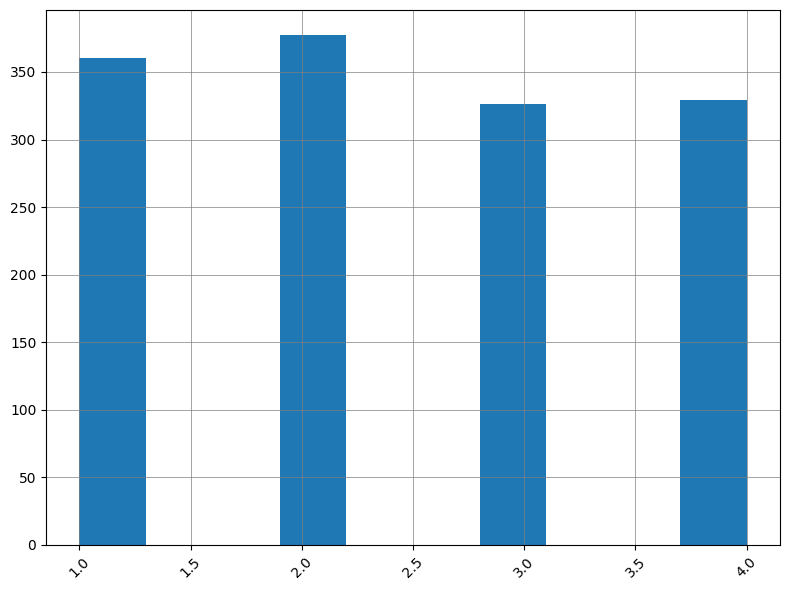

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.hist(df["Jumlah"])
plt.grid(color="gray", linestyle="-", linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

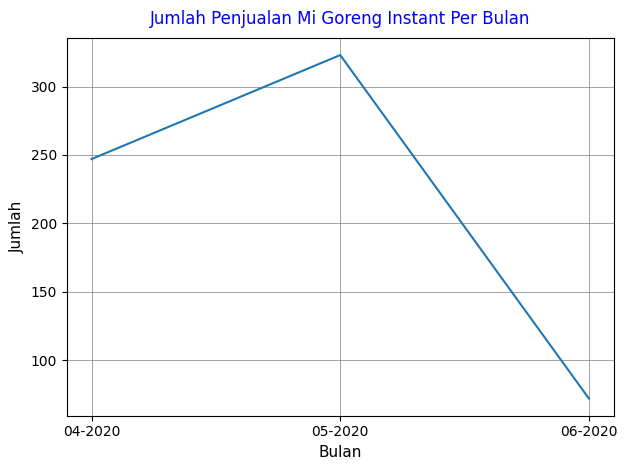

In [ ]:
# mengambil data Mi Goreng Instant saja
produk_mi = df[df["Nama Produk"] == "Mi Goreng Instant"]

# x adalah bulan transaksi
x = ["04-2020", "05-2020", "06-2020"]

# y jumlah item Mi Goreng Instant yang terjual
y = produk_mi.groupby(["Bulan","Nama Produk"])["Jumlah"].sum()

# membuat line chart menggunakan fungsi plot
plt.plot(x, y)
plt.title("Jumlah Penjualan Mi Goreng Instant Per Bulan", pad=10, fontsize=12, color="Blue")
plt.xlabel("Bulan", fontsize=11)
plt.ylabel("Jumlah", fontsize=11)
plt.grid(color="gray", linestyle="-", linewidth=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# Menghitung total harga untuk setiap row
df["Total"] = df["Jumlah"] * df["Harga"]

# menghitung total penjualan per produk per bulan
print(df.groupby(["Bulan", "Nama Produk"])["Total"].sum())

Bulan    Nama Produk            
04-2020  Balsem Putih 20 gram        289900
         Batere AA                   948000
         Bawang Putih 200 gram      2535000
         Beras Pulen 5 kg           1701000
         Biskuit Waver Kaleng       2208000
         Gula Pasir Putih 1 kg      3400000
         Ketan Hitam 500 gram        414000
         Kopi Instant                639600
         Mi Goreng Instant           642200
         Obat Batuk                  365000
         Obat Diare                   20000
         Pisau Cukur                 201500
         Roti Tawar                 1200000
         Sabun Cuci Piring          1344000
         Sabun Mandi Cair 100 ml    2047500
         Sabut Cuci Piring           210000
         Teh Celup Melati            452400
         Telur Ayam Negeri            49300
         Vitamin C                   196000
05-2020  Batere AA                  1116000
         Bawang Putih 200 gram      3300000
         Biskuit Waver Kaleng       1032000

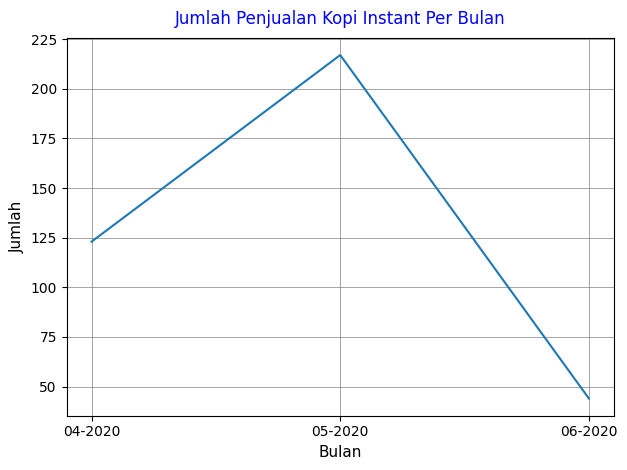

In [ ]:
# mengambil data Kopi Instant saja
produk_kopi = df[df["Nama Produk"] == "Kopi Instant"]

# x adalah bulan transaksi
x = ["04-2020", "05-2020", "06-2020"]

# y jumlah item Kopi Instant yang terjual
y = produk_kopi.groupby(["Bulan", "Nama Produk"])["Jumlah"].sum()

import matplotlib.pyplot as plt
# membuat line chart menggunakan fungsi plot
plt.plot(x, y)
plt.title("Jumlah Penjualan Kopi Instant Per Bulan", pad=10, fontsize=12, color="blue")
plt.xlabel("Bulan", fontsize=11)
plt.ylabel("Jumlah",fontsize=11)
plt.grid(color="gray", linestyle="-", linewidth=0.5)
plt.tight_layout()
plt.show()